In [1]:
%matplotlib inline
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np

In [2]:
NNtarget = pd.read_excel('NN_target.xlsx')
NNtarget.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,RDPNNYRPR/3,0.351,0.0567,[2],0,0.0097,104,0.134,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P61221|ABCE1_HUMAN(pre=R,post=I)",1033722385
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,VVYRPHGR/3,0.242,0.0230,[2],0,0.3340,66,0.112,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q99715|COCA1_HUMAN(pre=R,post=G)",1375227218
2,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,HESGASIK/2,0.283,0.0200,[2],0,-0.0010,66,0.112,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P61978|HNRPK_HUMAN(pre=R,post=I)",487820518
3,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,RRPENPKPQDGK/4,0.877,0.4170,[2],0,-0.0010,6,0.394,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",1068743785
4,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.917,0.5650,[2],0,-0.0020,104,0.140,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",1068740085


In [3]:
NNdecoy = pd.read_excel('NN_decoy.xlsx')
NNdecoy.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PMQHHGAVPGPRGR/4,0.317,0.106,[2],0,0.002,16,0.145,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O94979|SC31A_HUMAN(pre=K,post=V)",1844493795
1,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,FDLHEILVYGYK/3,0.242,0.011,[2],0,-0.001,110,0.110,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q5VWT5|FYB2_HUMAN(pre=K,post=H)",2685883769
2,b1906_293T_proteinID_01A_QE3_122212.01934.01934.3,1,KHSEEHSE/3,0.289,0.034,[2],0,0.327,4,0.229,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P05109|S10A8_HUMAN(pre=K,post=-)",2419891089
3,b1906_293T_proteinID_01A_QE3_122212.01941.01941.2,1,VDLGDDVTHR/2,0.151,0.012,[2],0,0.507,125,0.043,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|O75155|CAND2_HUMAN(pre=K,post=K)",1901067338
4,b1906_293T_proteinID_01A_QE3_122212.01942.01942.3,1,IESEVIPIEGLSK/3,0.344,0.010,[2],0,0.005,68,0.156,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P53618|COPB_HUMAN(pre=R,post=K)",2434735228


In [4]:
PPtarget = pd.read_excel('PP_target.xlsx')
PPtarget.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01873.01873.3,1,LSVEADINGLR/3,0.374,0.0582,[2],0,0.330,84,0.0949,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q04695|K1C17_HUMAN(pre=R,post=R)",165241441
1,b1906_293T_proteinID_01A_QE3_122212.01882.01882.3,1,RYPAHLAR/3,0.157,0.0210,[2],0,0.334,35,0.0670,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|Q9H773|DCTP1_HUMAN(pre=R,post=S)",219973774
2,b1906_293T_proteinID_01A_QE3_122212.01905.01905.3,1,RRPENPKPQDGK/3,0.479,0.1990,[2],0,-0.002,85,0.0930,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P67809|YBOX1_HUMAN(pre=R,post=E)",217882790
3,b1906_293T_proteinID_01A_QE3_122212.01909.01909.3,1,HGGYKPSDEHK/3,0.579,0.2430,[2],0,-0.003,19,0.1080,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P12277|KCRB_HUMAN(pre=R,post=T)",97722560
4,b1906_293T_proteinID_01A_QE3_122212.01910.01910.4,1,HGGYKPSDEHK/4,0.611,0.4520,[2],0,-0.002,4,0.2180,...,-1,0,0,(),Normal,Unk,Unk,1,"sp|P12277|KCRB_HUMAN(pre=R,post=T)",97723630


In [5]:
PPdecoy = pd.read_excel('PP_decoy.xlsx')
PPdecoy.head()

,### Query,Rk,ID,Dot,Delta,DelRk,DBias,MzDiff,#Cand,MeanDot,...,PValue,KSScore,OpModMass,OpModLoc,Status,Inst,Spec,#Pr,Proteins,LibFileOffset
0,b1906_293T_proteinID_01A_QE3_122212.01886.01886.2,1,HSGPFQR/2,0.231,0.089,[2],0,0.004,30,0.064,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q15006|EMC2_HUMAN(pre=R,post=V)",603411124
1,b1906_293T_proteinID_01A_QE3_122212.01899.01899.4,1,PRHNGFEGPALVK/4,0.168,0.043,[2],0,-0.002,5,0.103,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q9NSY1|BMP2K_HUMAN(pre=K,post=G)",713157922
2,b1906_293T_proteinID_01A_QE3_122212.01913.01913.2,1,PWDDLDLSR/2,0.184,0.022,[2],0,0.495,48,0.056,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q99490|AGAP2_HUMAN(pre=R,post=E)",650652258
3,b1906_293T_proteinID_01A_QE3_122212.01926.01926.4,1,PERGTSLAHLEMR/4,0.381,0.182,[2],0,0.003,12,0.098,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|P40306|PSB10_HUMAN(pre=K,post=V)",562345113
4,b1906_293T_proteinID_01A_QE3_122212.01927.01927.3,1,EERLNETDIHLK/3,0.277,0.074,[2],0,0.001,97,0.074,...,-1,0,0,(),Normal,Unk,Unk,1,"XXX_sp|Q14BN4|SLMAP_HUMAN(pre=R,post=D)",527831030


In [25]:
nntarget = NNtarget['Dot'] > 0.616
nnt = NNtarget[nntarget]
nnt_set = set(nnt['ID'])
nnt_set

{'AANNIASLLTK/2',
 'LTEEVPLGQSIPR/2',
 'DTVILPIK/2',
 'QLDMILDEQR/2',
 'EYILVEEAK/2',
 'EEVVLLTHGDSVDK/3',
 'LAGENMTGAAK/2',
 'EQMVAVTEANEALK/2',
 'GRVNFDDYTVNLGGLK/2',
 'SALEEFSK/2',
 'FHHTFSTEIAK/2',
 'VGSFLAVGTVK/2',
 'LRENVFQEHQTLK/2',
 'DLKPQNLLINER/3',
 'AHPRPPLPPGPSPASTFLGEVASGDDR/4',
 'VPIPQVTR/2',
 'ASESSKPWPDATYGTGSASR/2',
 'INFDDSK/2',
 'SAAAIALPPIAK/2',
 'IEAINQAIANEYEVR/2',
 'DVPNPNQDDDDDEGFSFNPLK/2',
 'AEAENTSEVSTVLK/2',
 'EYWMDPEGEMK/2',
 'LNPFGNTFLNR/2',
 'HKSETDTSLIR/3',
 'LVELLMHNDYK/3',
 'VGLFHSDR/2',
 'EQIEWLIEHK/3',
 'NSTGGTSVGWDSPPASPLQR/2',
 'TDYHILNDPELSFLDAHK/4',
 'KKAEPSEVDMNSPK/3',
 'LQSGVNTLQGFK/2',
 'YDGVHFSVNDSK/2',
 'QQREDITQSAQHALR/3',
 'YVPVGLLER/2',
 'NNPPTLEGNYSK/2',
 'KQELDLNSSMR/3',
 'TTTSSAMTSTIGFR/2',
 'SRPPFDVVIDGLNVAK/3',
 'ILRPWQSSETR/2',
 'LSNGLAR/2',
 'GIGEFFR/2',
 'YLALDEADR/2',
 'IDLNTGK/2',
 'LMEAFILR/2',
 'FLQQMQQEQIIQVK/2',
 'IMQNTDPHSQEYVEHLK/2',
 'GQYNTYPIK/2',
 'RPLEMEQQQAYRPEMK/3',
 'PMYSNPPLNGAR/2',
 'DIIFAIK/2',
 'LLEEAQLQDLEK/2',


In [26]:
pptarget = PPtarget['Dot'] > 0.527
ppt = PPtarget[pptarget]
ppt_set = set(ppt['ID'])
ppt_set

{'AANNIASLLTK/2',
 'LTEEVPLGQSIPR/2',
 'QLDMILDEQR/2',
 'EEVVLLTHGDSVDK/3',
 'LAGENMTGAAK/2',
 'EQMVAVTEANEALK/2',
 'TFPLPAVGLER/2',
 'SPLKPESQLDLR/2',
 'GRVNFDDYTVNLGGLK/2',
 'FHHTFSTEIAK/2',
 'VGSFLAVGTVK/2',
 'LRENVFQEHQTLK/2',
 'DLKPQNLLINER/3',
 'AHPRPPLPPGPSPASTFLGEVASGDDR/4',
 'ASESSKPWPDATYGTGSASR/2',
 'SAAAIALPPIAK/2',
 'IEAINQAIANEYEVR/2',
 'DVPNPNQDDDDDEGFSFNPLK/2',
 'AEAENTSEVSTVLK/2',
 'EYWMDPEGEMK/2',
 'LNPFGNTFLNR/2',
 'HKSETDTSLIR/3',
 'LVELLMHNDYK/3',
 'VGLFHSDR/2',
 'EQIEWLIEHK/3',
 'NSTGGTSVGWDSPPASPLQR/2',
 'TDYHILNDPELSFLDAHK/4',
 'GKDEAMAIGGHWSPSLDGPDPEKDPSVLIK/4',
 'KKAEPSEVDMNSPK/3',
 'LQSGVNTLQGFK/2',
 'IDENDVSKPLQIFHDPPLPASDSK/4',
 'QQREDITQSAQHALR/3',
 'YDGVHFSVNDSK/2',
 'NNPPTLEGNYSK/2',
 'KQELDLNSSMR/3',
 'TTTSSAMTSTIGFR/2',
 'SRPPFDVVIDGLNVAK/3',
 'HINWEELLAR/3',
 'LNGHQLENHALK/2',
 'ILRPWQSSETR/2',
 'YLALDEADR/2',
 'TSATGGLGSIK/2',
 'FLQQMQQEQIIQVK/2',
 'IMQNTDPHSQEYVEHLK/2',
 'RPLEMEQQQAYRPEMK/3',
 'AVVTHSSGNHGQALTYAAK/4',
 'PMYSNPPLNGAR/2',
 'LLEEAQLQDL

Text(0.5, 1.0, 'Ntarget VS. Ptarget')

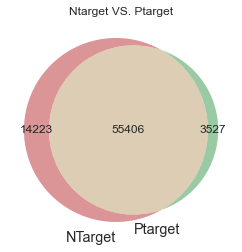

In [27]:
v = venn2([nnt_set, ppt_set], ('NTarget', 'Ptarget'), alpha = 0.6)
plt.title('Ntarget VS. Ptarget')

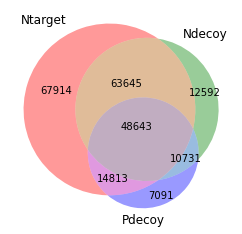

In [14]:
v3 = venn3([NPtarget, Ndecoy, Pdecoy], ('Ntarget', 'Ndecoy', 'Pdecoy'))